In [1]:

import random
import math
import numpy as np
import matplotlib.pyplot as plt


# dX(t) = 10(Y(t)-X(t))dt          + dU(t),    X(0) = -5.91652
# dY(t) = (X(t)(28-Z(t)) - Y(t))dt + dV(t),    Y(0) = -5.52332
# dZ(t) = (X(t)Y(t)-8Z(t)/3)dt     + dW(t),    Z(0) = 24.57231
# where U, V, and W are independent Brownian motions.

def init_XYZ(m):
    X = np.zeros(m)
    Y = np.zeros(m)
    Z = np.zeros(m)
    X[0] = -5.91652
    Y[0] = -5.52332
    Z[0] = 24.57231
    return (X,Y,Z)

def plot_3d(X,title="",h=0, T=0):
    ax = plt.axes(projection='3d')
    ax.plot3D(X[0,:], X[1,:], X[2,:], 'blue')
    plt.title(f'{title}\nh={h} T={T}')
    plt.show()

# dX(t) = 10(Y(t)-X(t))dt          + dU(t),    X(0) = -5.91652
# dY(t) = (X(t)(28-Z(t)) - Y(t))dt + dV(t),    Y(0) = -5.52332
# dZ(t) = (X(t)Y(t)-8Z(t)/3)dt     + dW(t),    Z(0) = 24.57231

# (Euler--Maryuma scheme 
# X(k+1) = X(k) + h b(kh, X(k)) + sqrt(h) sigma(kh, X(k)) xi^(k+1)
def Lorenz_Euler_Maryuma(T, h):
    m = int(T/h)
    (X, Y, Z) = init_XYZ(m)
    
    # generate random variable xi
    def xi():
        return 1 if random.random() < 0.5 else -1

    for k in range(0,m-1):
        X[k+1] = X[k] + (h*10*(Y[k]-X[k])+math.sqrt(h)*xi())
        Y[k+1] = Y[k] + (h*((X[k]*(28-Z[k]))-Y[k])+math.sqrt(h)*xi())
        Z[k+1] = Z[k] + (h*(X[k]*Y[k]-8*Z[k]/3)+math.sqrt(h)*xi())
    
    return np.array([X,Y,Z])


# (A) Euler Scheme
def Lorenz_Euler(T, h):
    m = int(T/h)
    (X, Y, Z) = init_XYZ(m)

    for k in range(0,m-1):
        X[k+1] = X[k] + h*10*(Y[k]-X[k])
        Y[k+1] = Y[k] + h*((X[k]*(28-Z[k]))-Y[k])
        Z[k+1] = Z[k] + h*(X[k]*Y[k]-8*Z[k]/3)
    
    return np.array([X,Y,Z])






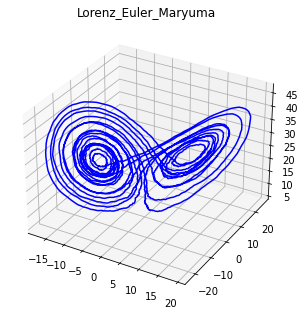

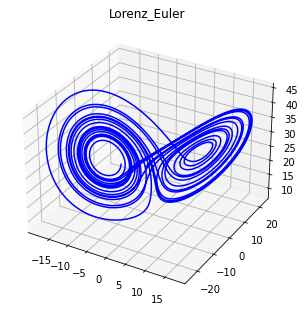

In [11]:
T = 20
h = 0.005
L = Lorenz_Euler_Maryuma(T, h)
plot_3d(L,"Lorenz_Euler_Maryuma")
L = Lorenz_Euler(T, h)
plot_3d(L,"Lorenz_Euler")


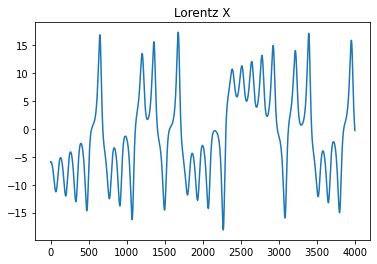

In [13]:
obs_x = L[0,:]
obs_y = L[1,:]
obs_z = L[2,:]
plt.plot(obs_x)
plt.title("Lorentz X")
plt.show()

# obs_grad = np.gradient(L)
# obs_grad = np.sum(obs_grad, axis=0)
# obs_grad = np.linalg.norm(obs_grad, axis=0)
# plt.plot(obs_grad)
# plt.title("Lorentz Vol")
# plt.show()

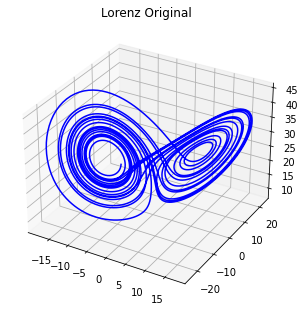

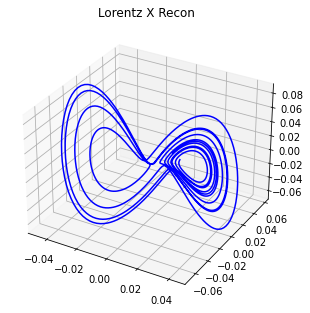

(20, 20) (20,) (20, 1980) (4000,) (2000,)


In [39]:
from tools import *


x_s = obs_x[:-2000]
new_x = obs_x[-2000:]
N = 20
H = build_hankel(x_s, N, len(x_s)-N)
u, s, v = np.linalg.svd(H, full_matrices=False)
H_hat = v[:3]
plot_3d(L, title="Lorenz Original")
plot_3d(H_hat,  title="Lorentz X Recon")

print(u.shape, s.shape, v.shape, obs_x.shape, new_x.shape)

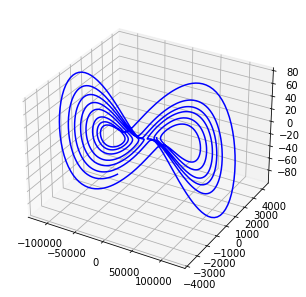

In [42]:
H_new = build_hankel(new_x, N, len(x_s)-N)
H_new.shape
new_recon = (u  @ np.diag(s)).T @ H_new
plot_3d(new_recon[:3])

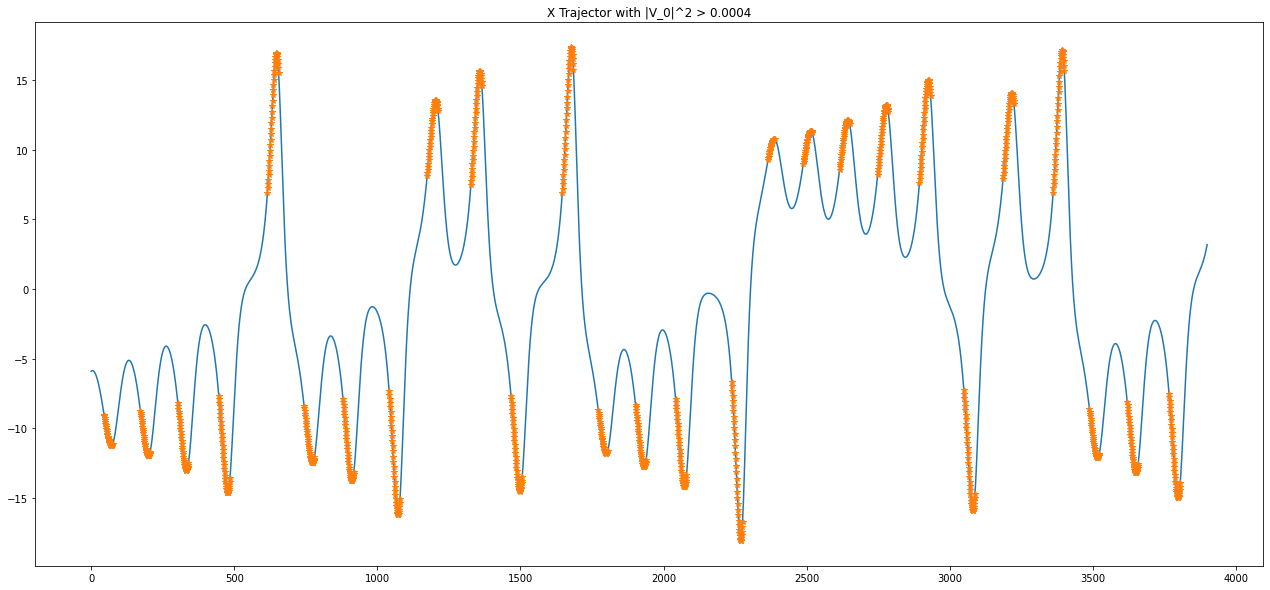

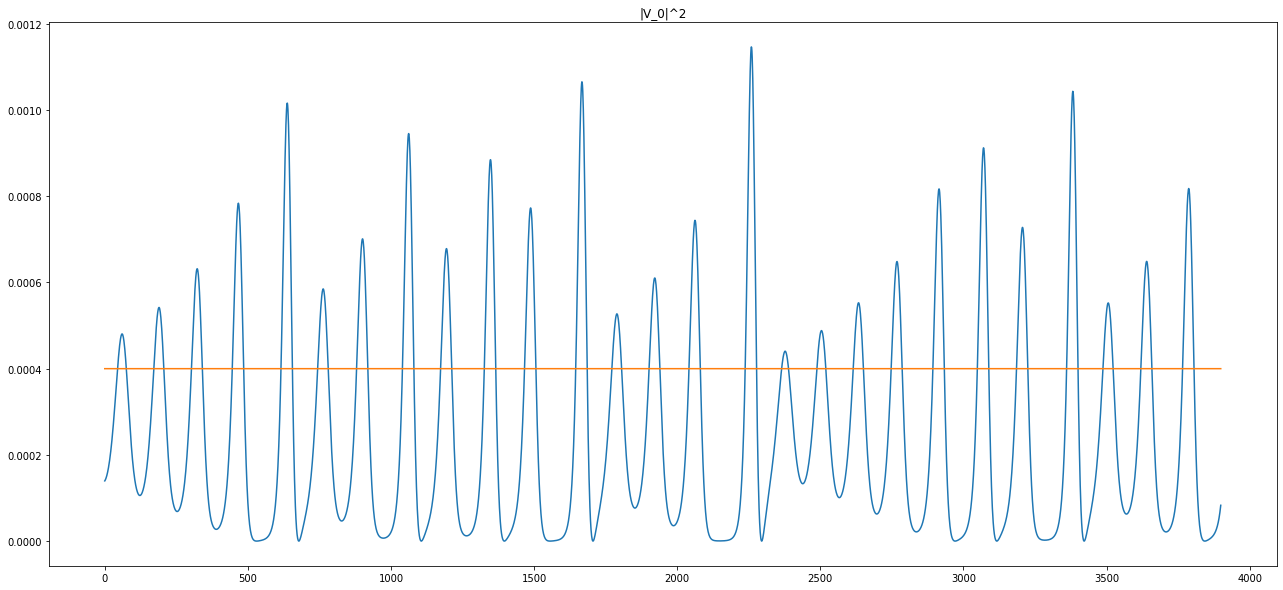

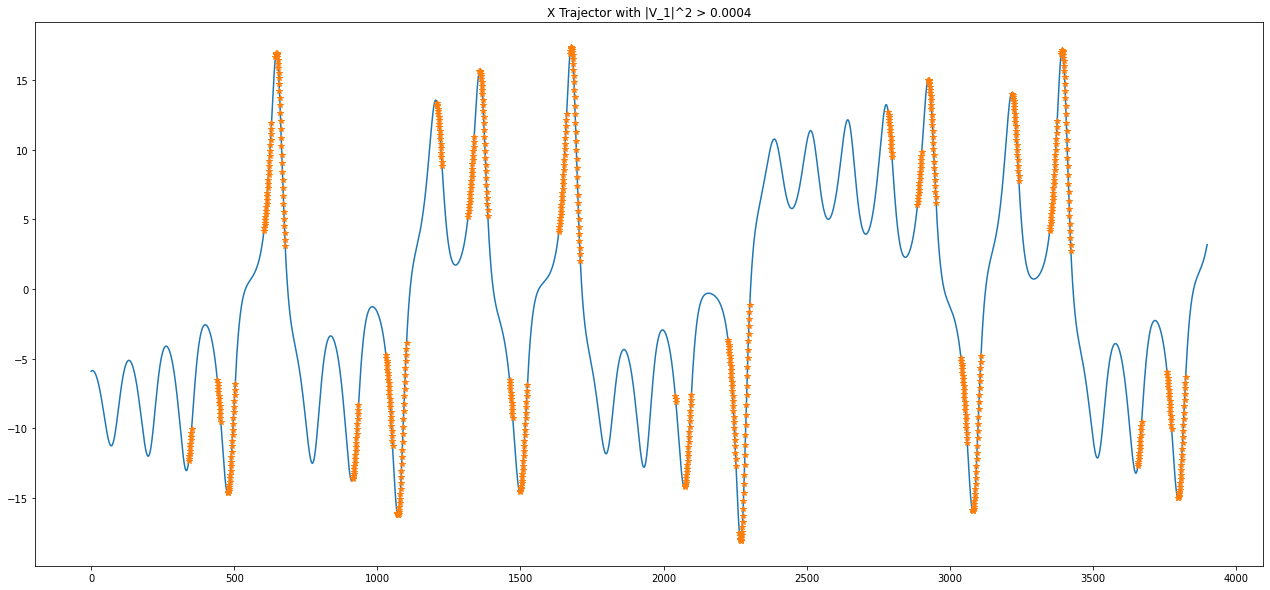

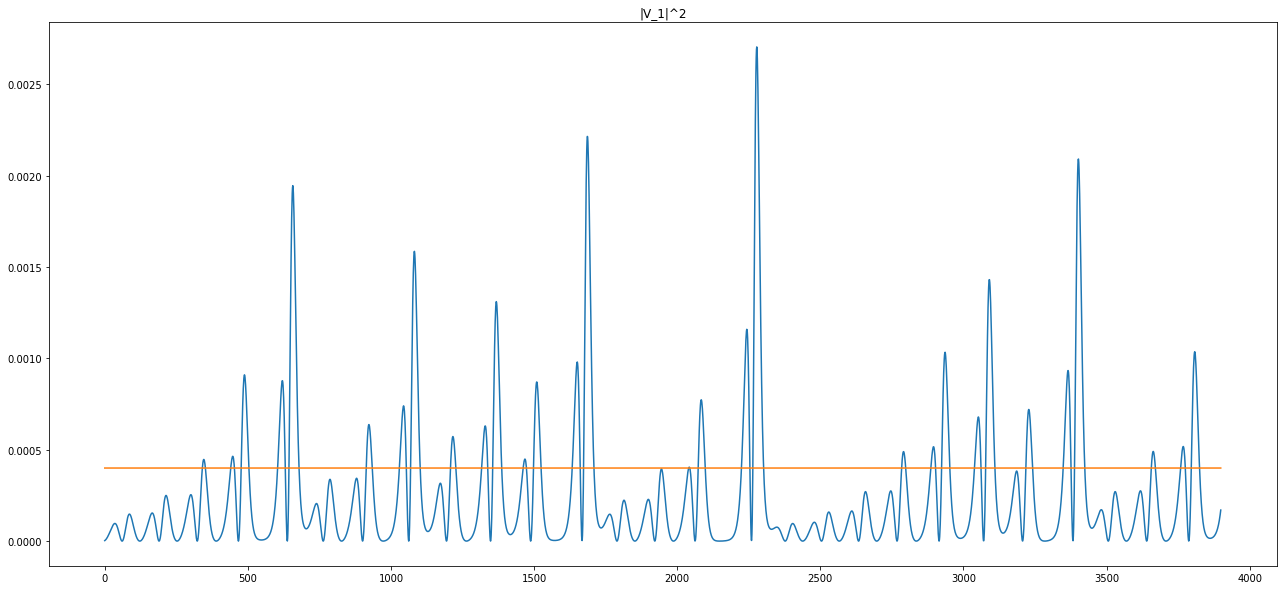

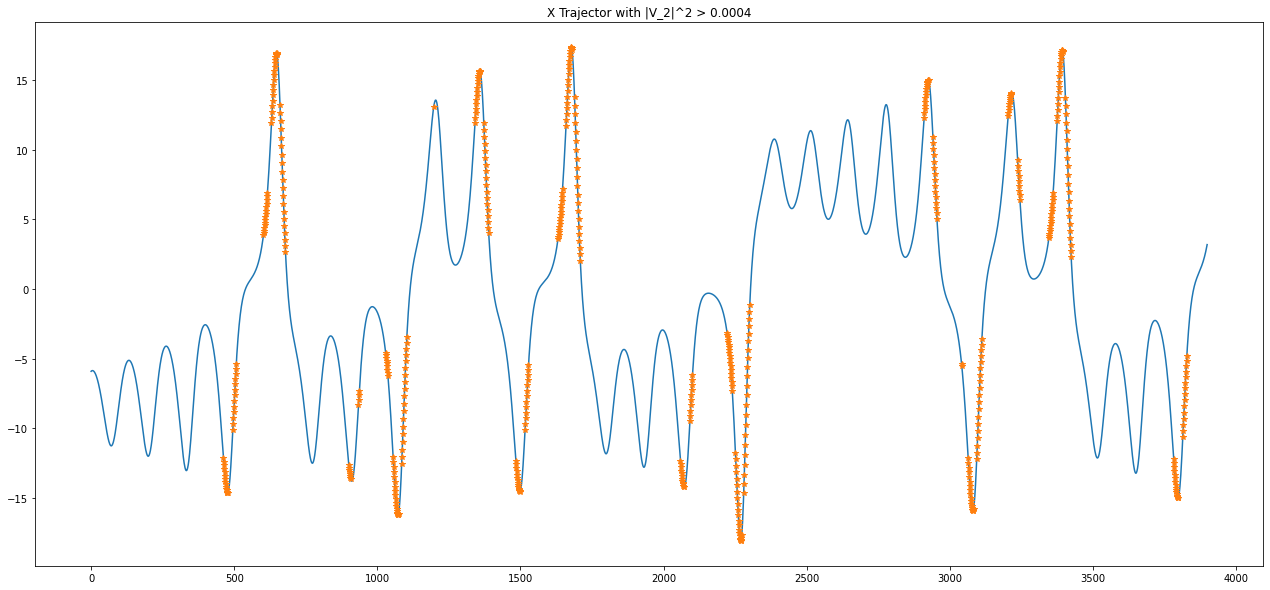

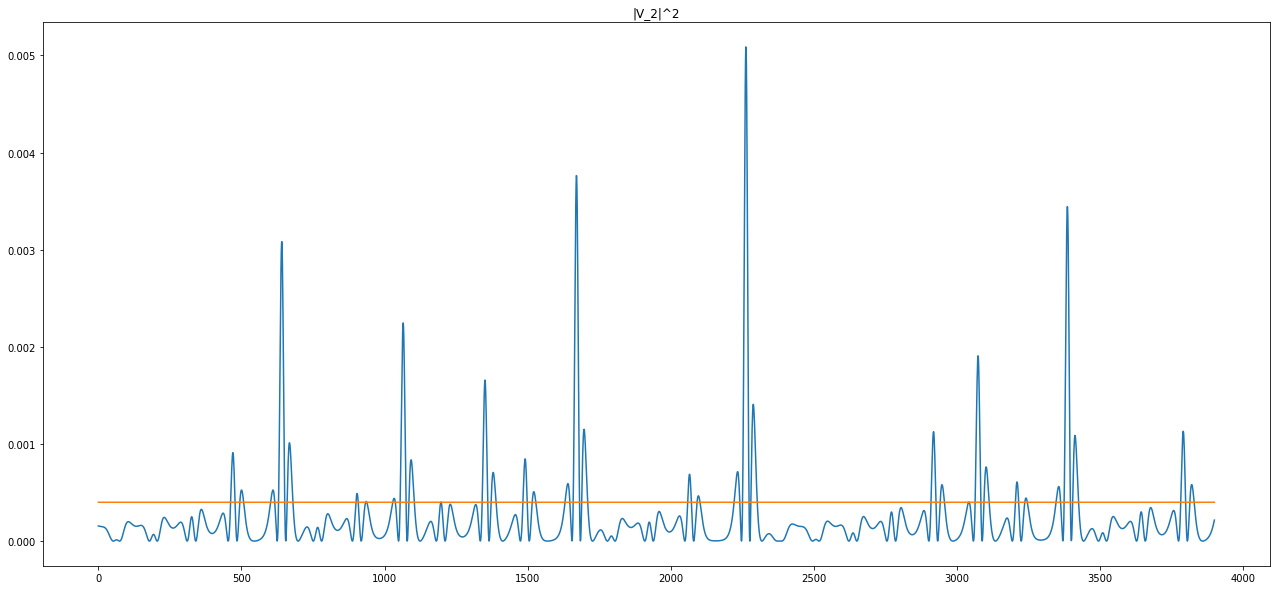

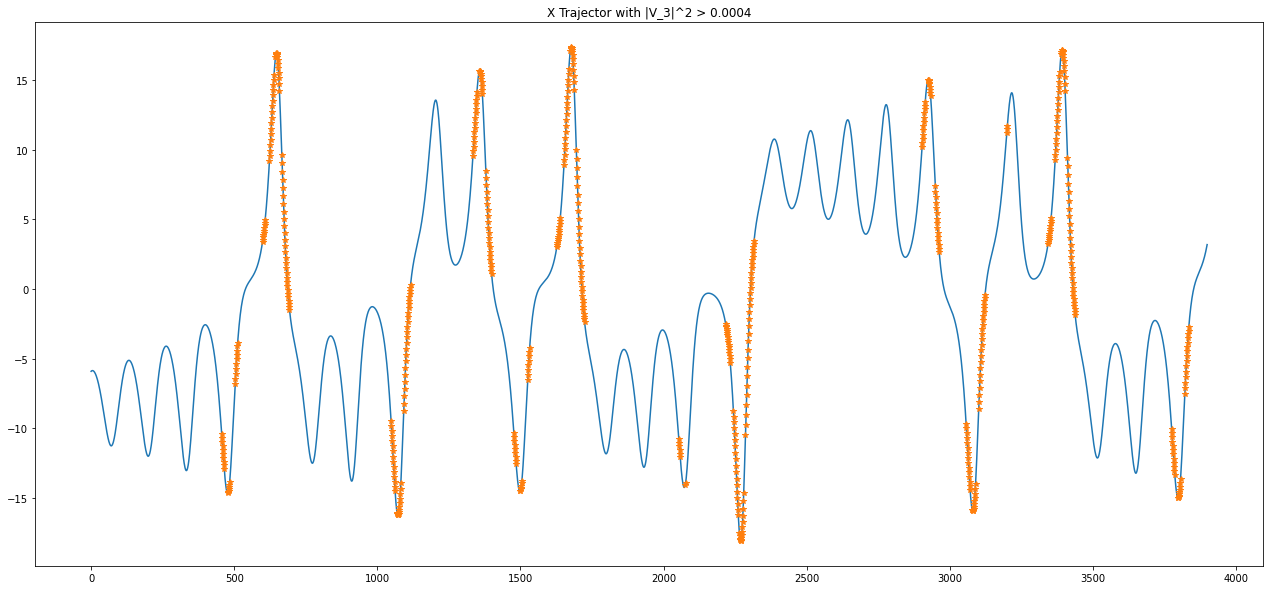

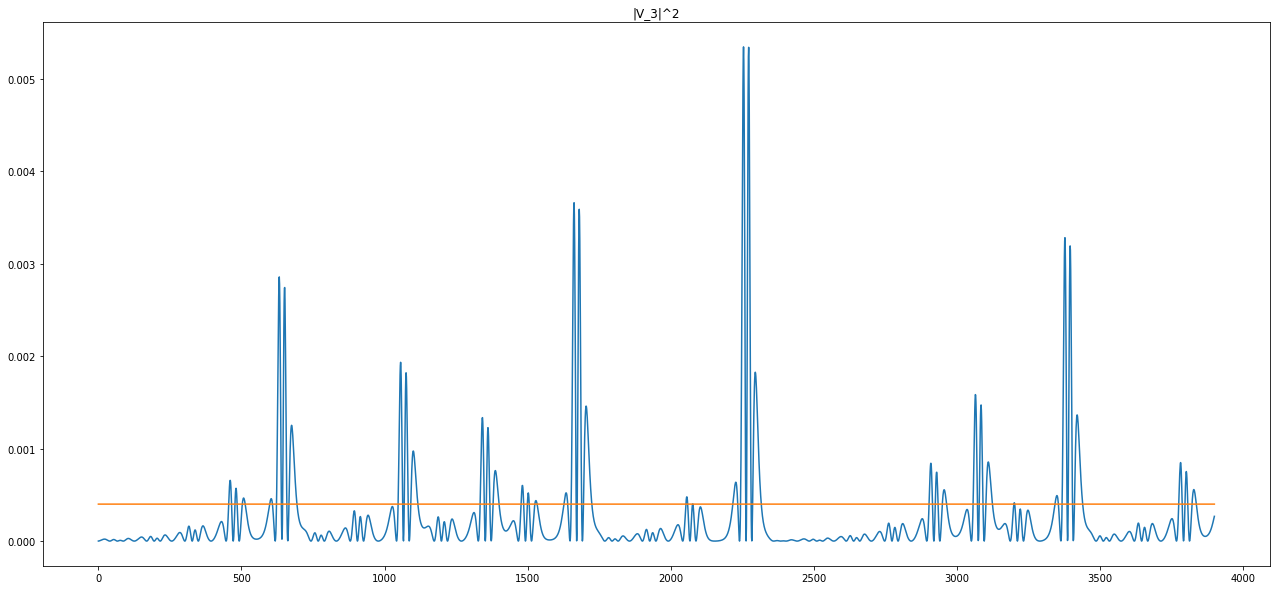

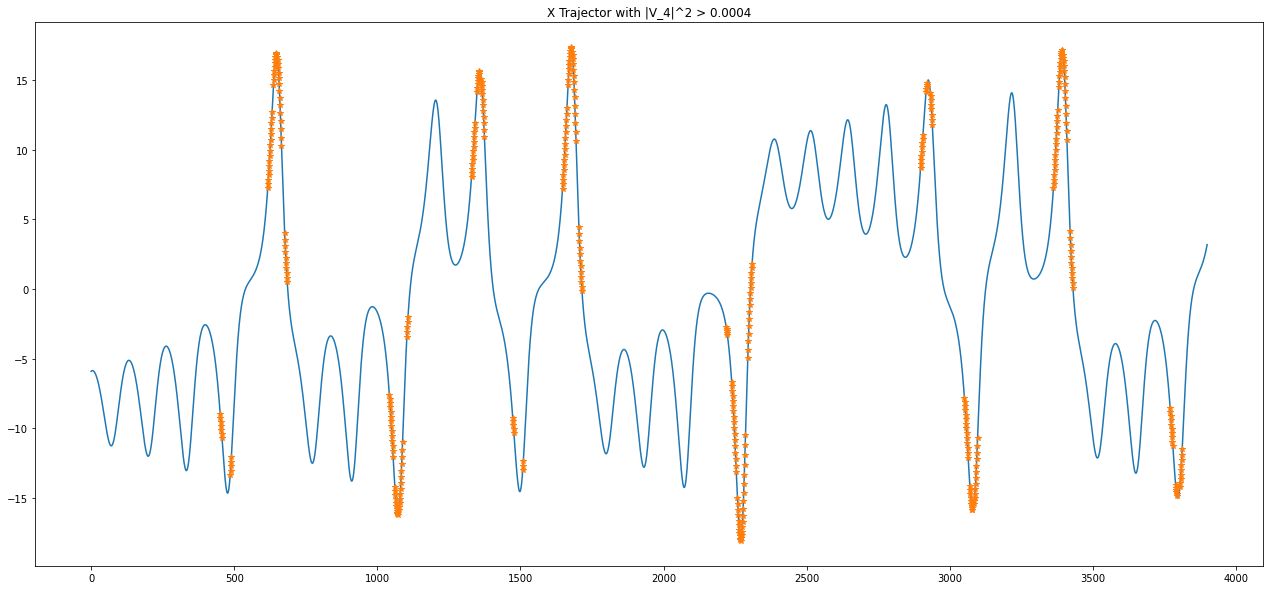

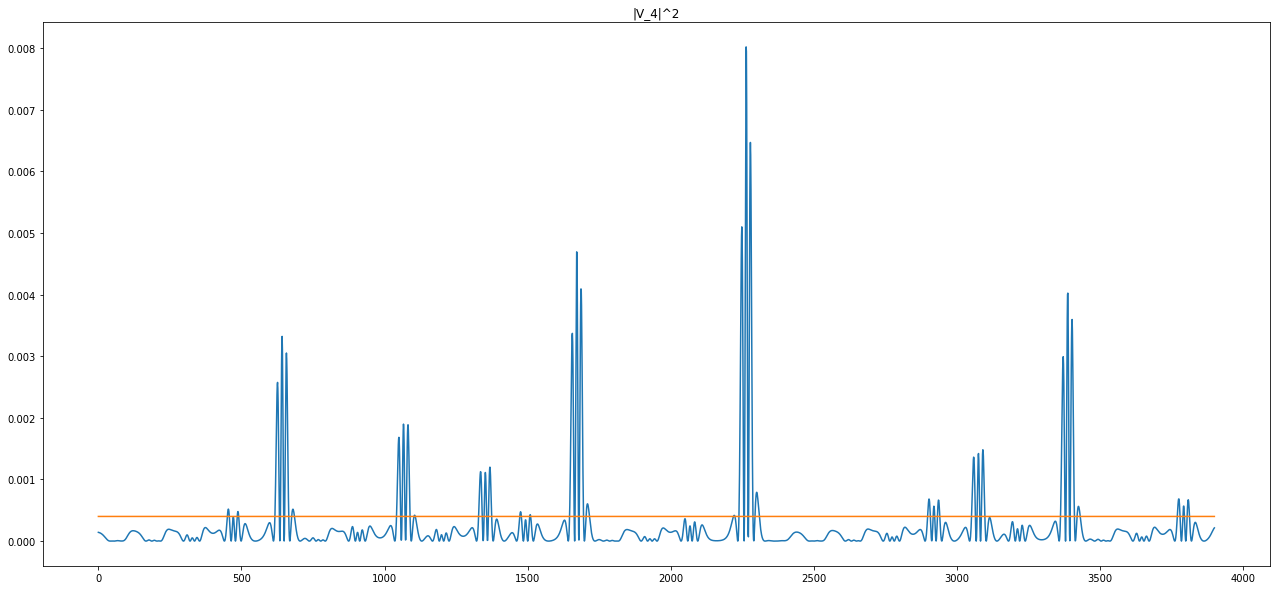

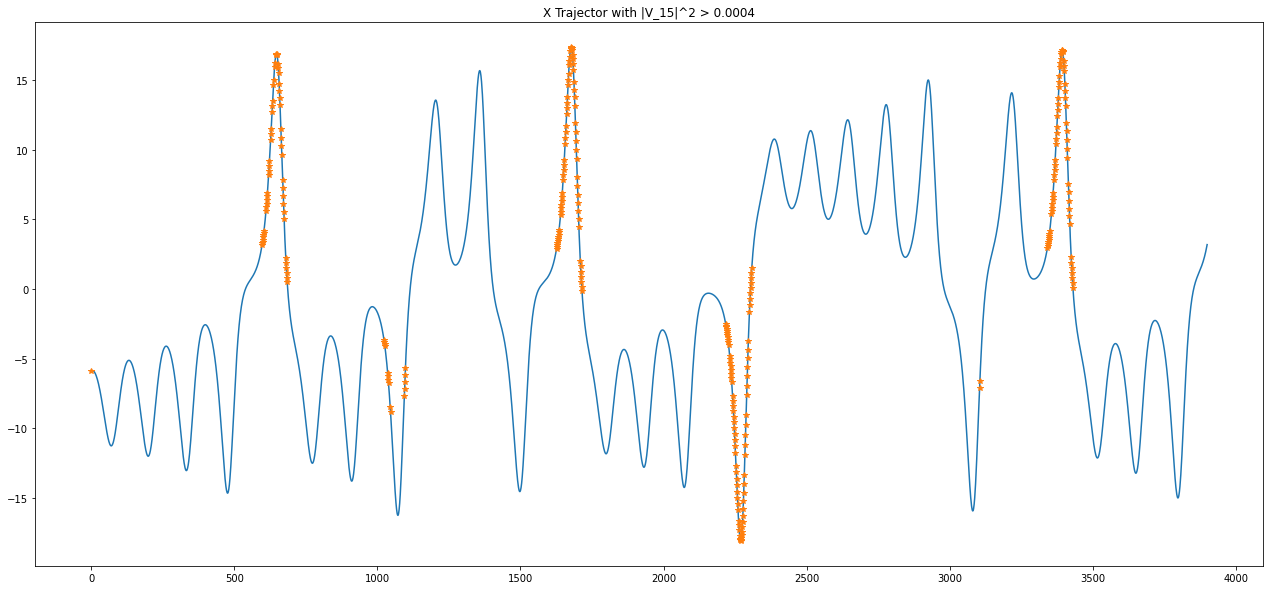

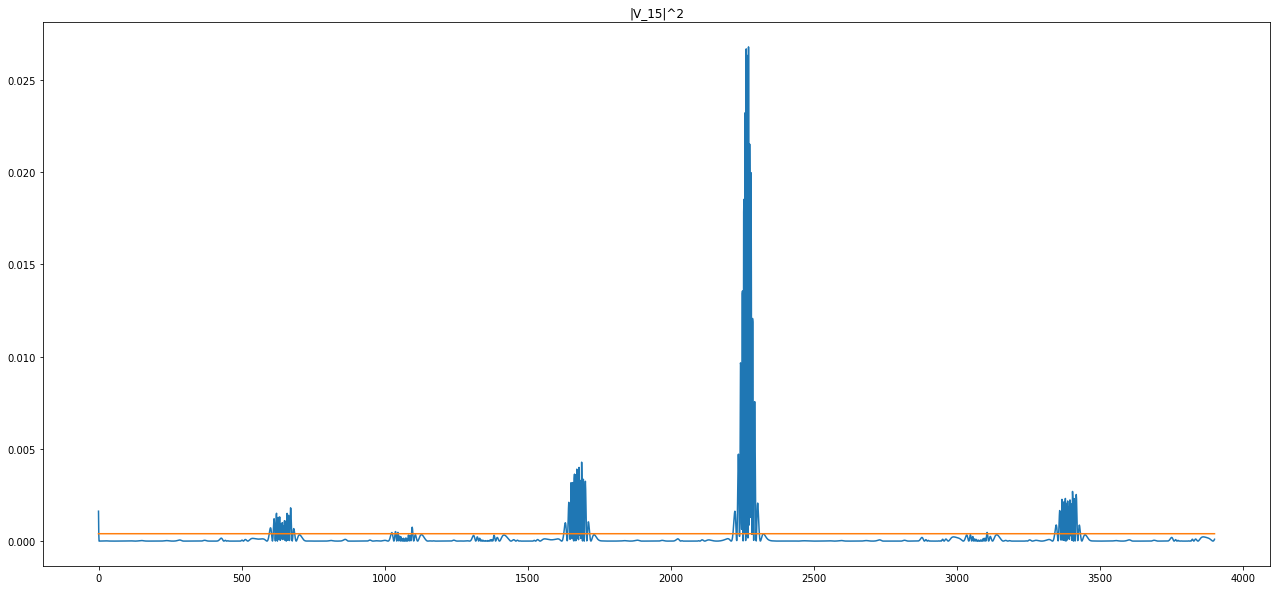

In [36]:
T = 3900
threshold = 4 * 10e-5
for s in [0,1,2,3,4,15]:


    v_sq = np.square(v[s,:T])


    fig = plt.figure()
    fig.set_size_inches(22,10)
    plt.plot(obs_x[:T])
    # plt.plot(obs_y[:T])
    # plt.plot(obs_z[:T])
    indc = v_sq > threshold
    plt.plot(np.arange(0,T,1)[indc], x[indc], '*')
    plt.title(f'X Trajector with |V_{s}|^2 > {threshold}')
    plt.show()

    fig = plt.figure()
    fig.set_size_inches(22,10)
    plt.plot(v_sq)
    plt.plot(np.ones_like(v_sq)*threshold)
    plt.title(f'|V_{s}|^2')
    plt.show()
# obs_delay, pca = gen_delay(lag, obs_grad, 3)
# plot_3d(obs_delay, "Lorentz V")